<a id='table_of_contents'></a>

0. [Import libraries](#imports)
1. [Import data](#import_data)
2. [Data exploration](#data_exploration)
3. [Data cleaning](#data_cleaning)
4. [Data preparation](#data_preparation)
5. [Benchmark model](#benchmark_model)<br>
6. [Feature engineering](#feature_engineering)
7. [Model training](#model_training)<br>
    7.1. [Decision Tree](#decision_tree)<br>
    7.2. [Random Forest](#random_forest)<br>
    7.3. [Comparing algorithm performances](#comparing_algorithm_performances)
8. [Tuning](#tuning)<br>

# 0. Import libraries <a id='imports'></a>
[Back to top](#table_of_contents)

In [3]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV

from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from math import sqrt

%matplotlib inline

# 1. Import data <a id='import_data'></a>
[Back to top](#table_of_contents)

In [4]:
df = pd.read_csv('yellow_tripdata_2019-01.csv')

In [5]:
print(df.shape)
df.head()

(7667792, 18)


,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge
0,1,2019-01-01 00:46:40,2019-01-01 00:53:20,1,1.5,1,N,151,239,1,7.0,0.5,0.5,1.65,0.0,0.3,9.95,NaN
1,1,2019-01-01 00:59:47,2019-01-01 01:18:59,1,2.6,1,N,239,246,1,14.0,0.5,0.5,1.00,0.0,0.3,16.30,NaN
2,2,2018-12-21 13:48:30,2018-12-21 13:52:40,3,0.0,1,N,236,236,1,4.5,0.5,0.5,0.00,0.0,0.3,5.80,NaN
3,2,2018-11-28 15:52:25,2018-11-28 15:55:45,5,0.0,1,N,193,193,2,3.5,0.5,0.5,0.00,0.0,0.3,7.55,NaN
4,2,2018-11-28 15:56:57,2018-11-28 15:58:33,5,0.0,2,N,193,193,2,52.0,0.0,0.5,0.00,0.0,0.3,55.55,NaN


# 2. Data exploration <a id='data_exploration'></a>
[Back to top](#table_of_contents)

In [6]:
df.columns

Index(['VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime',
       'passenger_count', 'trip_distance', 'RatecodeID', 'store_and_fwd_flag',
       'PULocationID', 'DOLocationID', 'payment_type', 'fare_amount', 'extra',
       'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge',
       'total_amount', 'congestion_surcharge'],
      dtype='object')

In [7]:
df = df[['tpep_pickup_datetime', 'tpep_dropoff_datetime',
       'passenger_count', 'trip_distance', 'RatecodeID',
       'PULocationID', 'DOLocationID', 'payment_type',
       'total_amount']]

In [8]:
df.head()

,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,total_amount
0,2019-01-01 00:46:40,2019-01-01 00:53:20,1,1.5,1,151,239,1,9.95
1,2019-01-01 00:59:47,2019-01-01 01:18:59,1,2.6,1,239,246,1,16.30
2,2018-12-21 13:48:30,2018-12-21 13:52:40,3,0.0,1,236,236,1,5.80
3,2018-11-28 15:52:25,2018-11-28 15:55:45,5,0.0,1,193,193,2,7.55
4,2018-11-28 15:56:57,2018-11-28 15:58:33,5,0.0,2,193,193,2,55.55


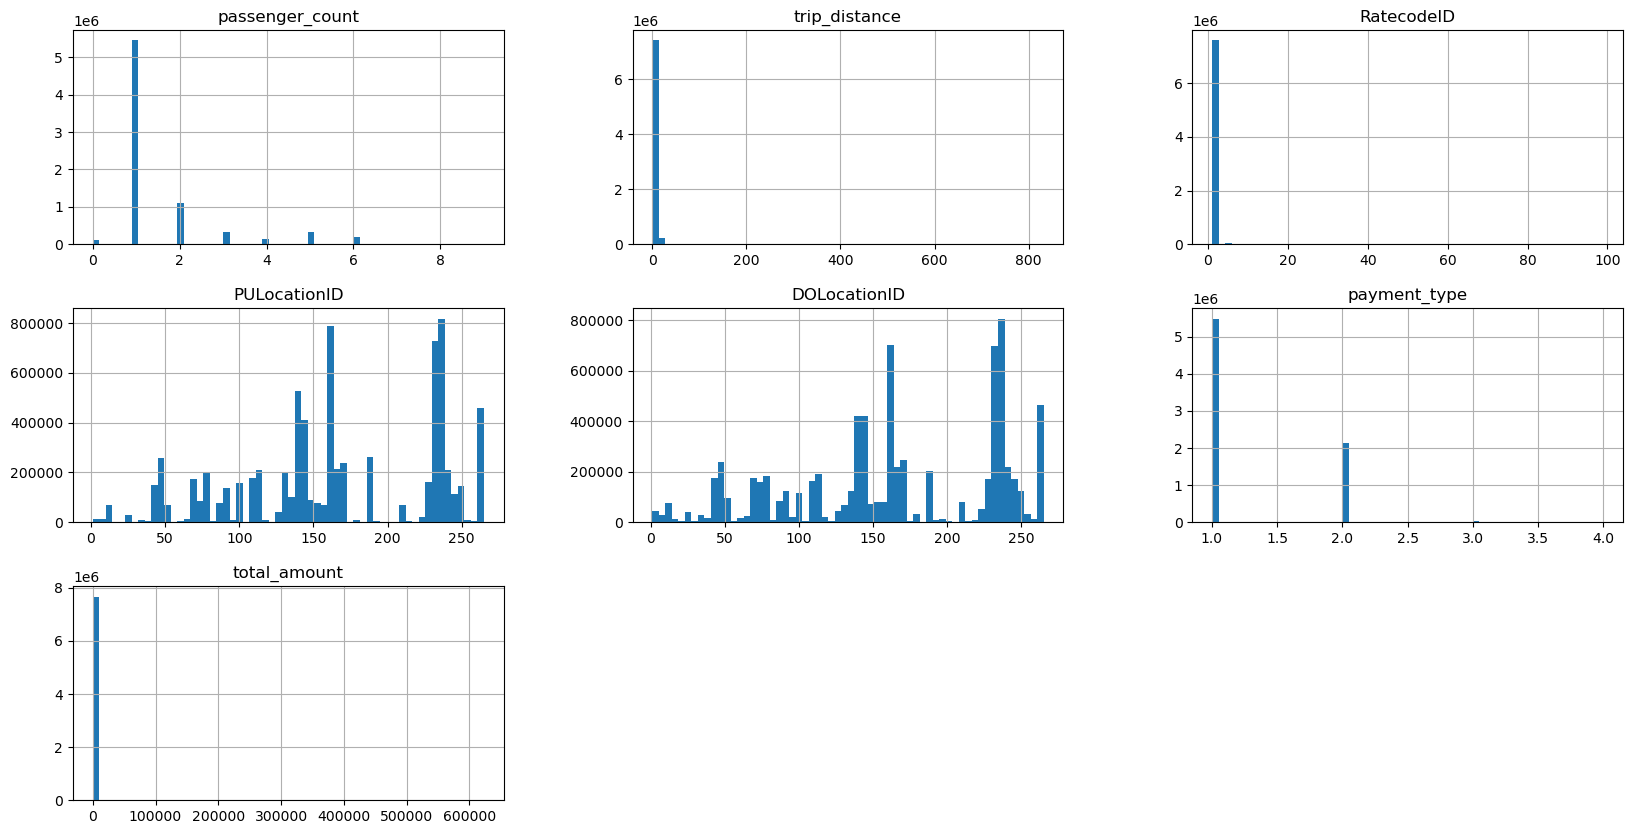

In [9]:
df.hist(figsize=(20,10), bins=60);

In [10]:
df['RatecodeID'].value_counts()

1     7430139
2      166090
5       54569
3       11801
4        4895
99        252
6          46
Name: RatecodeID, dtype: int64

<AxesSubplot: xlabel='index', ylabel='total_amount'>

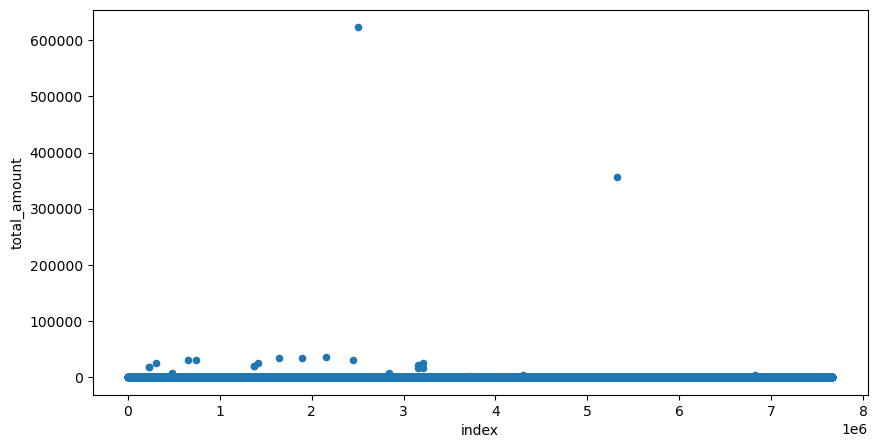

In [11]:
df.reset_index().plot(kind='scatter', y='total_amount', x='index', figsize=(10,5))

<AxesSubplot: xlabel='index', ylabel='total_amount'>

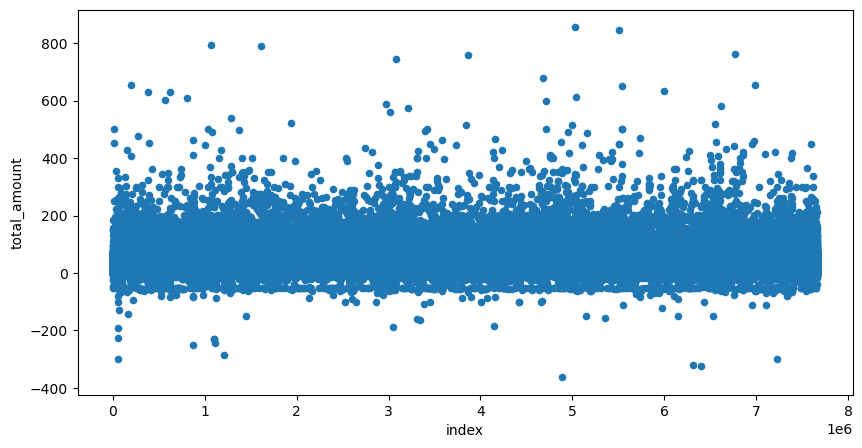

In [12]:
df[df['total_amount']<1000].reset_index().plot(kind='scatter',
                                               y='total_amount',
                                               x='index',
                                               figsize=(10,5))

(7131, 9)


<AxesSubplot: xlabel='index', ylabel='total_amount'>

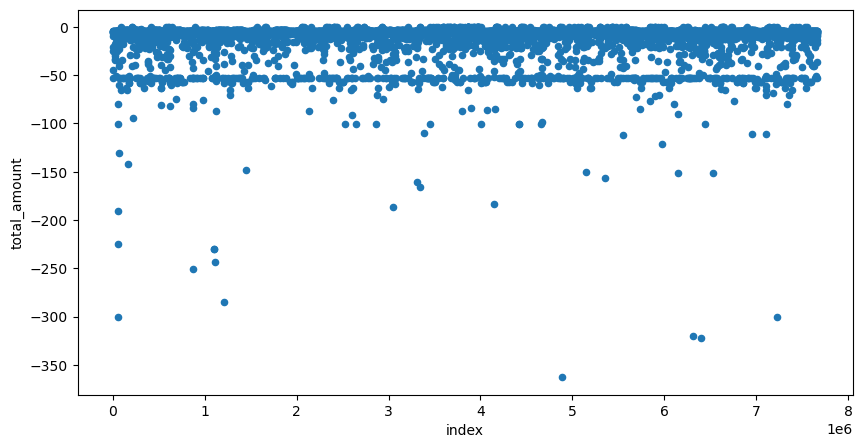

In [13]:
print(df[df['total_amount']<0].shape)
df[df['total_amount']<0].reset_index().plot(kind='scatter', y='total_amount', x='index', figsize=(10,5))

In [14]:
df[df['total_amount']<0].head()

,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,total_amount
663,2019-01-01 00:32:56,2019-01-01 00:33:35,2,0.10,1,148,148,3,-3.8
2402,2019-01-01 00:14:18,2019-01-01 00:40:55,1,4.13,1,170,238,4,-20.3
2541,2019-01-01 00:31:27,2019-01-01 00:42:39,1,1.35,1,162,234,4,-9.8
2544,2019-01-01 00:45:57,2019-01-01 00:46:07,1,0.00,1,234,234,4,-3.8
2547,2019-01-01 00:48:35,2019-01-01 00:49:59,1,0.16,1,234,234,4,-4.3


In [15]:
df[df['total_amount']<0]['payment_type'].value_counts()

3    4088
4    2666
2     376
1       1
Name: payment_type, dtype: int64

<AxesSubplot: >

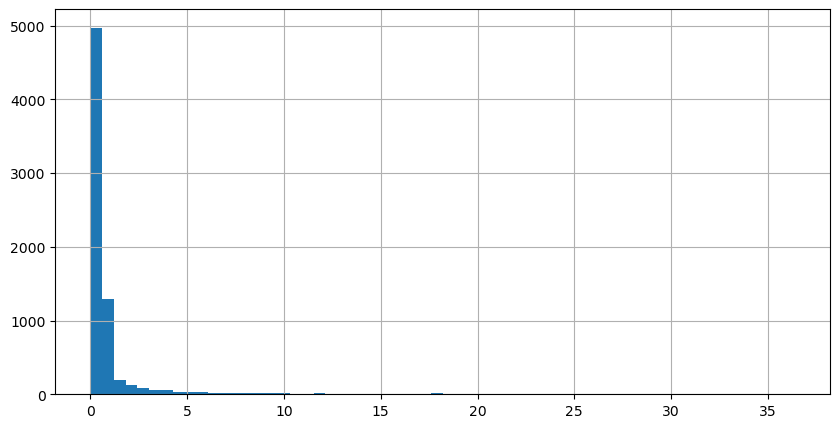

In [16]:
df[df['total_amount']<0]['trip_distance'].hist(bins=60, figsize=(10,5))

In [17]:
print(df[df['total_amount']==0].shape)
df[df['total_amount']==0].head()

(1414, 9)


,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,total_amount
3552,2019-01-01 00:18:46,2019-01-01 00:18:46,1,0.0,5,186,264,2,0.0
9138,2019-01-01 00:41:47,2019-01-01 00:41:47,1,0.0,5,246,264,2,0.0
13256,2019-01-01 00:19:38,2019-01-01 00:20:35,1,0.0,1,193,193,1,0.0
13257,2019-01-01 00:43:34,2019-01-01 00:43:34,1,0.0,1,7,7,2,0.0
13258,2019-01-01 00:02:52,2019-01-01 00:02:52,1,0.0,1,264,7,2,0.0


In [18]:
df[df['total_amount']==0]['payment_type'].value_counts()

1    815
2    569
3     29
4      1
Name: payment_type, dtype: int64

<AxesSubplot: >

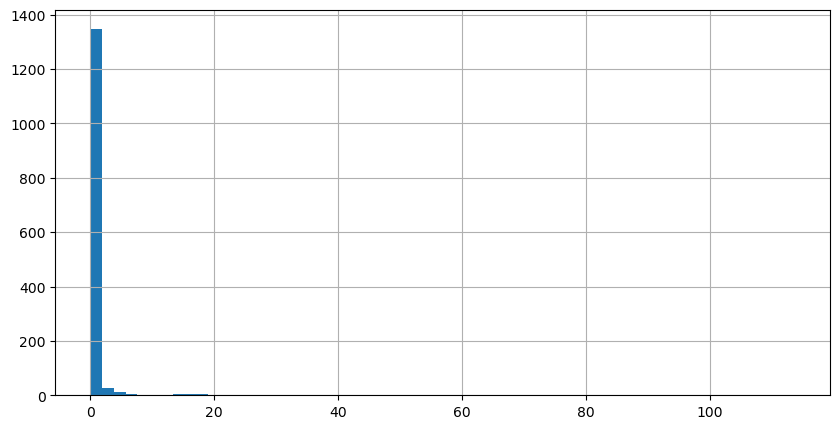

In [19]:
df[df['total_amount']==0]['trip_distance'].hist(bins=60, figsize=(10,5))

In [20]:
df[df['total_amount']==0]['trip_distance'].value_counts()

0.00     1270
1.00        4
0.02        4
0.01        4
0.10        3
         ... 
0.59        1
10.84       1
2.91        1
1.20        1
0.53        1
Name: trip_distance, Length: 110, dtype: int64

<AxesSubplot: xlabel='index', ylabel='total_amount'>

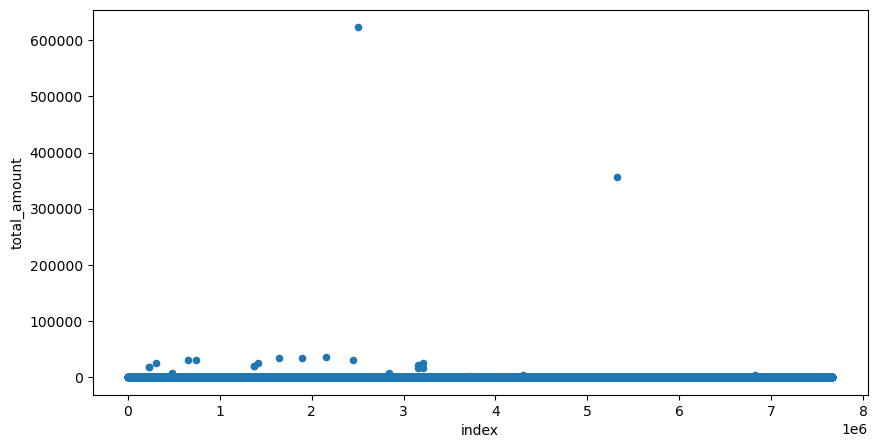

In [21]:
df.reset_index().plot(kind='scatter', y='total_amount', x='index', figsize=(10,5))

In [22]:
df[df['total_amount']>200].shape

(1166, 9)

In [23]:
df['total_amount'].mean()

15.68222215991253

# 3. Data cleaning <a id='data_cleaning'></a>
[Back to top](#table_of_contents)

In [24]:
df_filtered = df[(df['total_amount']>=0) & (df['total_amount']<200)]

In [25]:
print(df.shape)
df_filtered.shape

(7667792, 9)


(7659490, 9)

In [26]:
df_filtered.isna().sum()

tpep_pickup_datetime     0
tpep_dropoff_datetime    0
passenger_count          0
trip_distance            0
RatecodeID               0
PULocationID             0
DOLocationID             0
payment_type             0
total_amount             0
dtype: int64

# 4. Data preparation <a id='data_preparation'></a>
[Back to top](#table_of_contents)

In [27]:
df_prepared = df_filtered.copy()

In [28]:
df_prepared.dtypes

tpep_pickup_datetime      object
tpep_dropoff_datetime     object
passenger_count            int64
trip_distance            float64
RatecodeID                 int64
PULocationID               int64
DOLocationID               int64
payment_type               int64
total_amount             float64
dtype: object

In [29]:
df_prepared.loc[:,'tpep_pickup_datetime'] = pd.to_datetime(df_prepared.loc[:,'tpep_pickup_datetime'])
df_prepared.loc[:,'tpep_dropoff_datetime'] = pd.to_datetime(df_prepared.loc[:,'tpep_dropoff_datetime'])

C:\Users\Rafael\AppData\Local\Temp\ipykernel_4768\1090279657.py:1: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df_prepared.loc[:,'tpep_pickup_datetime'] = pd.to_datetime(df_prepared.loc[:,'tpep_pickup_datetime'])
C:\Users\Rafael\AppData\Local\Temp\ipykernel_4768\1090279657.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df_prepared.loc[:,'tpep_dropoff_datetime'] = pd.to_datetime(df_prepared.loc[:,'tpep_dropoff_datetime'])


In [30]:
df_prepared.loc[:,'RatecodeID'] = df_prepared['RatecodeID'].astype(str)
df_prepared.loc[:,'PULocationID'] = df_prepared['PULocationID'].astype(str)
df_prepared.loc[:,'DOLocationID'] = df_prepared['DOLocationID'].astype(str)
df_prepared.loc[:,'payment_type'] = df_prepared['payment_type'].astype(str)

In [31]:
df_prepared.dtypes

tpep_pickup_datetime     datetime64[ns]
tpep_dropoff_datetime    datetime64[ns]
passenger_count                   int64
trip_distance                   float64
RatecodeID                       object
PULocationID                     object
DOLocationID                     object
payment_type                     object
total_amount                    float64
dtype: object

In [32]:
df_prepared['transaction_date'] = pd.to_datetime(df_prepared['tpep_pickup_datetime'].dt.date)
df_prepared['transaction_year'] = df_prepared['tpep_pickup_datetime'].dt.year
df_prepared['transaction_month'] = df_prepared['tpep_pickup_datetime'].dt.month
df_prepared['transaction_day'] = df_prepared['tpep_pickup_datetime'].dt.day
df_prepared['transaction_hour'] = df_prepared['tpep_pickup_datetime'].dt.hour

In [33]:
df_prepared.head()

,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,total_amount,transaction_date,transaction_year,transaction_month,transaction_day,transaction_hour
0,2019-01-01 00:46:40,2019-01-01 00:53:20,1,1.5,1,151,239,1,9.95,2019-01-01,2019,1,1,0
1,2019-01-01 00:59:47,2019-01-01 01:18:59,1,2.6,1,239,246,1,16.30,2019-01-01,2019,1,1,0
2,2018-12-21 13:48:30,2018-12-21 13:52:40,3,0.0,1,236,236,1,5.80,2018-12-21,2018,12,21,13
3,2018-11-28 15:52:25,2018-11-28 15:55:45,5,0.0,1,193,193,2,7.55,2018-11-28,2018,11,28,15
4,2018-11-28 15:56:57,2018-11-28 15:58:33,5,0.0,2,193,193,2,55.55,2018-11-28,2018,11,28,15


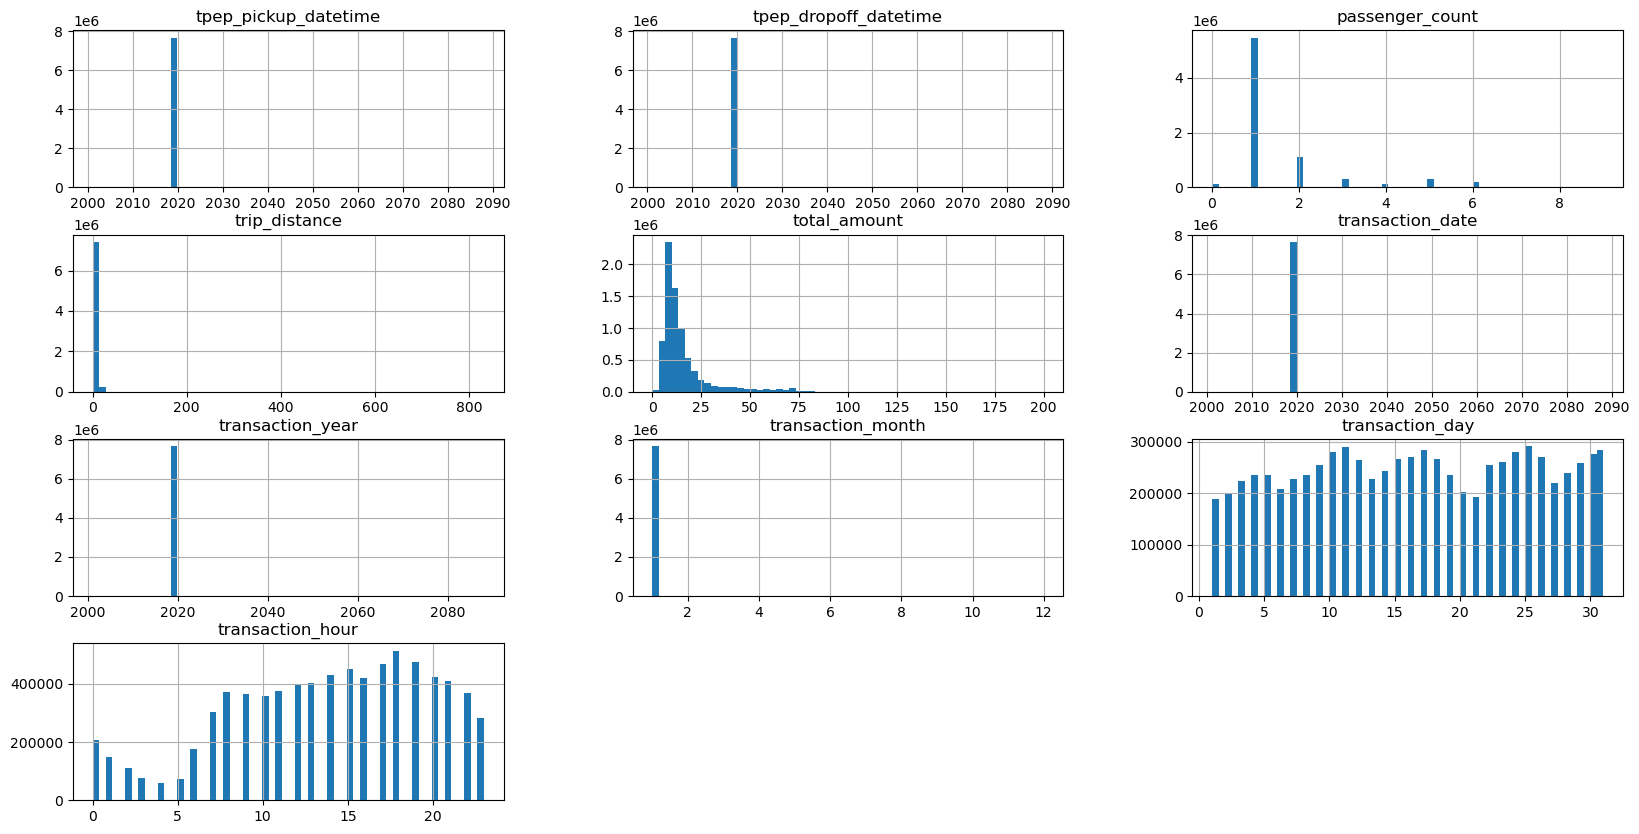

In [34]:
df_prepared.hist(figsize=(20,10), bins=60);

In [35]:
df_prepared = df_prepared[df_prepared['transaction_year'] == 2019]
df_prepared = df_prepared[df_prepared['transaction_month']==1]

In [36]:
categorical_columns = ['PULocationID', 'transaction_date', 'transaction_month', 'transaction_day', 'transaction_hour']
numerical_columns = ['trip_distance', 'total_amount']
all_needed_columns = categorical_columns + numerical_columns

In [37]:
main_df = df_prepared[all_needed_columns]
print(main_df.shape)
main_df.head()

(7658954, 7)


,PULocationID,transaction_date,transaction_month,transaction_day,transaction_hour,trip_distance,total_amount
0,151,2019-01-01,1,1,0,1.5,9.95
1,239,2019-01-01,1,1,0,2.6,16.30
7,163,2019-01-01,1,1,0,1.3,9.05
8,229,2019-01-01,1,1,0,3.7,18.50
9,141,2019-01-01,1,1,0,2.1,13.00


In [38]:
df_grouped_by_region = main_df.groupby(categorical_columns
                                        ).mean().reset_index()
df_grouped_by_region['count_of_transactions'] = main_df.groupby(categorical_columns).count().reset_index()['total_amount']

print(df_grouped_by_region.shape)
df_grouped_by_region.head()

(102556, 8)


,PULocationID,transaction_date,transaction_month,transaction_day,transaction_hour,trip_distance,total_amount,count_of_transactions
0,1,2019-01-01,1,1,2,0.0,21.800,1
1,1,2019-01-01,1,1,5,0.0,87.300,1
2,1,2019-01-01,1,1,6,0.0,80.300,1
3,1,2019-01-01,1,1,8,0.0,128.580,2
4,1,2019-01-01,1,1,10,16.9,43.245,4


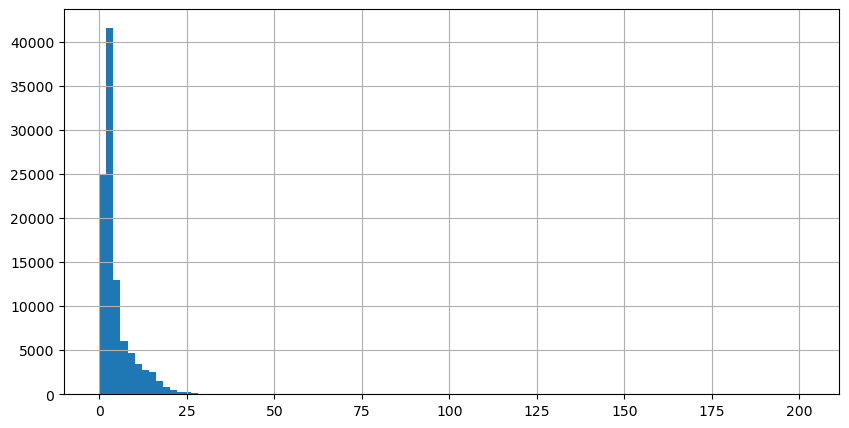

In [39]:
df_grouped_by_region['trip_distance'].hist(bins=100, figsize=(10,5));

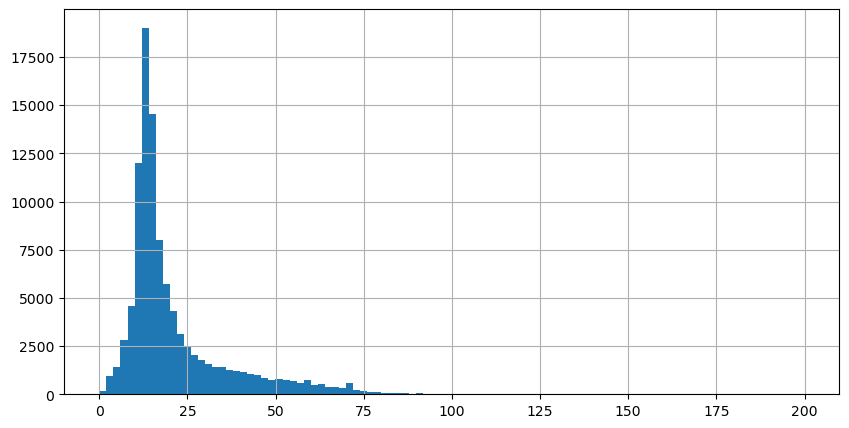

In [40]:
df_grouped_by_region['total_amount'].hist(bins=100, figsize=(10,5));

# 5. Benchmark model <a id='benchmark_model'></a>
[Back to top](#table_of_contents)

In [41]:
data_for_benchmark_model = df_grouped_by_region.copy()

## 5.1. Train-test split <a id='train_test'></a>

In [42]:
X_bench = data_for_benchmark_model.drop(['total_amount', 'transaction_date', 'trip_distance', 'total_amount', 'count_of_transactions'], axis=1)
y_bench = data_for_benchmark_model['total_amount']

# One-hot encode
X_bench = pd.get_dummies(X_bench)

X_train_b, X_test_b, y_train_b, y_test_b = train_test_split(X_bench, y_bench, test_size=0.2, random_state=42) 

## 5.2. Fit a model to the data <a id='fit_model'></a>

In [43]:
tree = DecisionTreeRegressor(max_depth=10)
tree.fit(X_train_b, y_train_b)

DecisionTreeRegressor(max_depth=10)

## 5.3. Model evaluation <a id='Evaluation'></a>

In [44]:
model_at_hand = tree

y_pred_b = model_at_hand.predict(X_test_b)

print('mean absolute error', mean_absolute_error(y_test_b, y_pred_b))
print('mean squared error', mean_squared_error(y_test_b, y_pred_b))
print('root mean absolute error', sqrt(mean_squared_error(y_test_b, y_pred_b)))
print('r2', r2_score(y_test_b, y_pred_b))

mean absolute error 9.748702336874285
mean squared error 214.02879330088163
root mean absolute error 14.62972293999041
r2 0.22558804218790962


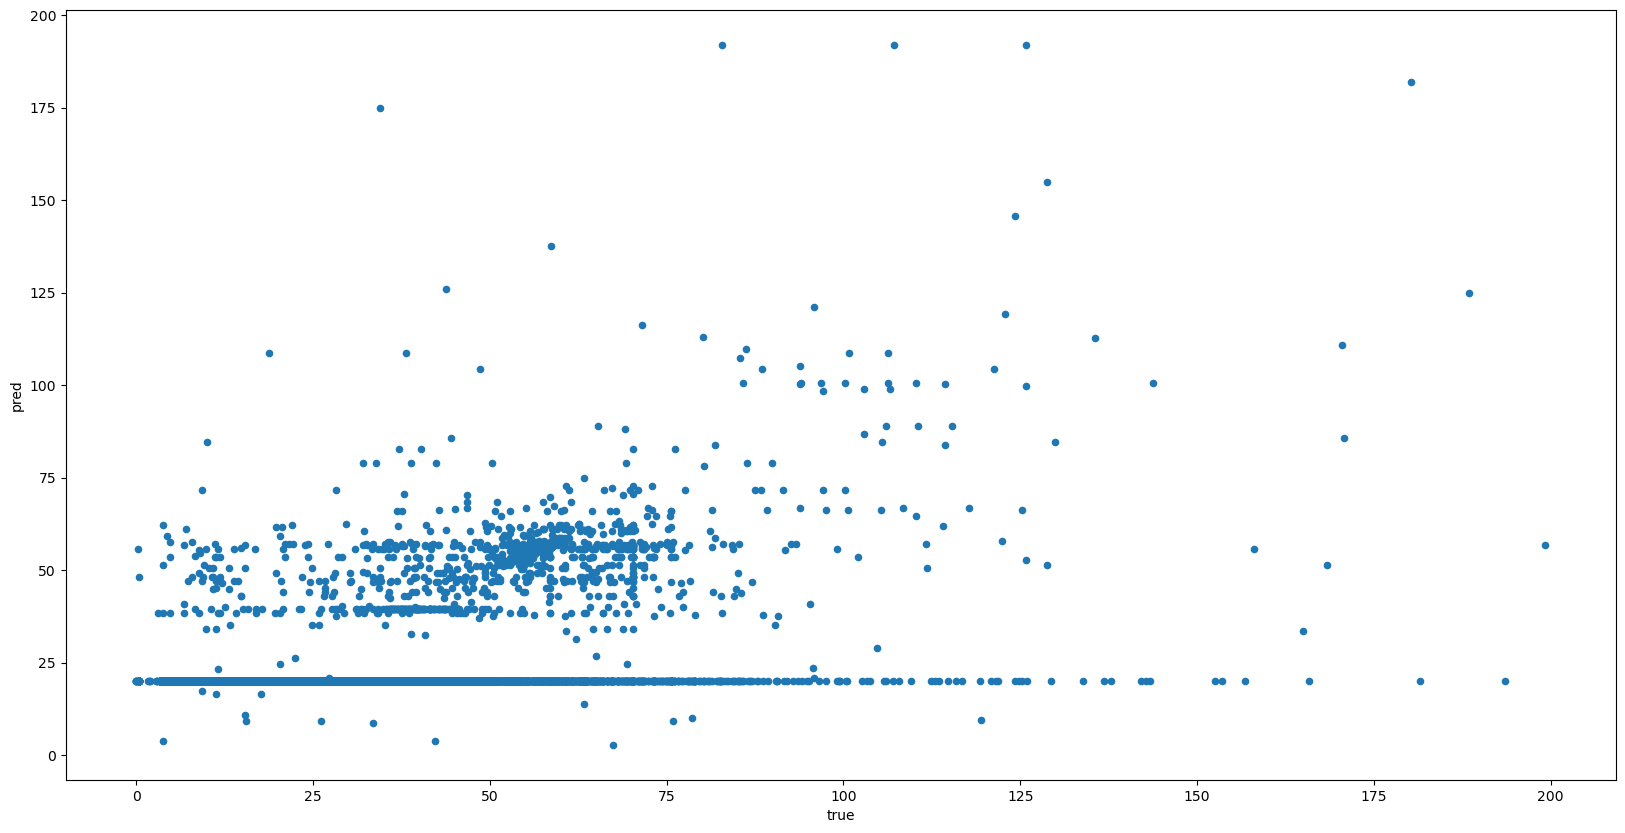

In [45]:
data = {'true': y_test_b, 'pred': y_pred_b}

results = pd.DataFrame(data)

results.plot(figsize=(20,10), kind='scatter', x='true', y='pred');

# 6. Feature engineering <a id='feature_engineering'></a>
[Back to top](#table_of_contents)

In [46]:
df_grouped_by_region.head()

,PULocationID,transaction_date,transaction_month,transaction_day,transaction_hour,trip_distance,total_amount,count_of_transactions
0,1,2019-01-01,1,1,2,0.0,21.800,1
1,1,2019-01-01,1,1,5,0.0,87.300,1
2,1,2019-01-01,1,1,6,0.0,80.300,1
3,1,2019-01-01,1,1,8,0.0,128.580,2
4,1,2019-01-01,1,1,10,16.9,43.245,4


In [47]:
df_with_new_features = df_grouped_by_region.copy()

#### Date-related features

In [48]:
df_with_new_features['transaction_week_day'] = df_with_new_features['transaction_date'].dt.weekday
df_with_new_features['weekend'] = df_with_new_features['transaction_week_day'].apply(lambda x: True if x==5 or x==6 else False)

In [49]:
from pandas.tseries.holiday import USFederalHolidayCalendar

cal = USFederalHolidayCalendar()
holidays = cal.holidays(start='2018',
                        end='2020').date

df_with_new_features['is_holiday'] = df_with_new_features['transaction_date'].isin(holidays)

In [50]:
df_with_new_features.head()

,PULocationID,transaction_date,transaction_month,transaction_day,transaction_hour,trip_distance,total_amount,count_of_transactions,transaction_week_day,weekend,is_holiday
0,1,2019-01-01,1,1,2,0.0,21.800,1,1,False,True
1,1,2019-01-01,1,1,5,0.0,87.300,1,1,False,True
2,1,2019-01-01,1,1,6,0.0,80.300,1,1,False,True
3,1,2019-01-01,1,1,8,0.0,128.580,2,1,False,True
4,1,2019-01-01,1,1,10,16.9,43.245,4,1,False,True


#### Borough information

In [51]:
zone_lookup = pd.read_csv('taxi_zone_lookup.csv')
zone_lookup = zone_lookup[['LocationID', 'Borough']]
zone_lookup['LocationID'] = zone_lookup['LocationID'].astype(str)
zone_lookup.head()

,LocationID,Borough
0,1,EWR
1,2,Queens
2,3,Bronx
3,4,Manhattan
4,5,Staten Island


In [52]:
df_with_new_features = df_with_new_features.merge(zone_lookup, left_on='PULocationID', right_on='LocationID', how='left')
df_with_new_features.head()

,PULocationID,transaction_date,transaction_month,transaction_day,transaction_hour,trip_distance,total_amount,count_of_transactions,transaction_week_day,weekend,is_holiday,LocationID,Borough
0,1,2019-01-01,1,1,2,0.0,21.800,1,1,False,True,1,EWR
1,1,2019-01-01,1,1,5,0.0,87.300,1,1,False,True,1,EWR
2,1,2019-01-01,1,1,6,0.0,80.300,1,1,False,True,1,EWR
3,1,2019-01-01,1,1,8,0.0,128.580,2,1,False,True,1,EWR
4,1,2019-01-01,1,1,10,16.9,43.245,4,1,False,True,1,EWR


In [53]:
df_with_new_features['Borough'].value_counts()

Manhattan        45309
Brooklyn         23633
Queens           22002
Bronx             9586
Unknown           1453
Staten Island      302
EWR                271
Name: Borough, dtype: int64

**Weather related features**

In [54]:
nyc_weather = pd.read_csv('nyc_weather.csv')
nyc_weather.head()

,date and time,temperature,humidity,wind speed,cloud cover,amount of precipitation
0,31.12.2019 22:00,6.1,65,6,100%.,0.3
1,31.12.2019 19:00,6.7,71,5,70 – 80%.,NaN
2,31.12.2019 16:00,7.2,66,5,50%.,NaN
3,31.12.2019 13:00,6.1,76,3,100%.,Trace of precipitation
4,31.12.2019 10:00,4.4,83,2,100%.,Trace of precipitation


In [55]:
nyc_weather.dtypes

date and time               object
temperature                float64
humidity                     int64
wind speed                   int64
cloud cover                 object
amount of precipitation     object
dtype: object

In [56]:
nyc_weather['cloud cover'].value_counts()

70 – 80%.                                                     973
100%.                                                         896
20–30%.                                                       479
50%.                                                          413
no clouds                                                     168
Sky obscured by fog and/or other meteorological phenomena.      3
Name: cloud cover, dtype: int64

In [57]:
nyc_weather['amount of precipitation'].value_counts()

Trace of precipitation    266
0.3                        61
2.0                        49
1.0                        45
0.5                        42
0.8                        42
4.0                        33
5.0                        24
3.0                        23
6.0                        19
7.0                        13
8.0                        13
9.0                        11
10.0                       10
13.0                        7
12.0                        7
15.0                        6
11.0                        5
16.0                        3
22.0                        2
14.0                        2
29.0                        2
63.0                        1
21.0                        1
68.0                        1
17.0                        1
20.0                        1
30.0                        1
35.0                        1
34.0                        1
24.0                        1
18.0                        1
25.0                        1
Name: amou

In [58]:
nyc_weather.isna().sum()

date and time                 0
temperature                   0
humidity                      0
wind speed                    0
cloud cover                   4
amount of precipitation    2240
dtype: int64

Trace of precipitation -> 0.1,
Missing values -> 0

In [59]:
nyc_weather['amount of precipitation'] = nyc_weather['amount of precipitation'].replace('Trace of precipitation', 0.1)
nyc_weather['amount of precipitation'].interpolate(inplace=True)

In [60]:
nyc_weather['cloud cover'] = nyc_weather['cloud cover'].replace('70 – 80%.', 0.7)
nyc_weather['cloud cover'] = nyc_weather['cloud cover'].replace('100%.', 1)
nyc_weather['cloud cover'] = nyc_weather['cloud cover'].replace('20–30%.', 0.3)
nyc_weather['cloud cover'] = nyc_weather['cloud cover'].replace('50%.', 0.5)
nyc_weather['cloud cover'] = nyc_weather['cloud cover'].replace('no clouds', 0)
nyc_weather['cloud cover'] = nyc_weather['cloud cover'].replace('Sky obscured by fog and/or other meteorological phenomena.', 1)
nyc_weather['cloud cover'] = nyc_weather['cloud cover'].astype(float)
nyc_weather['cloud cover'].interpolate(inplace=True)

In [61]:
nyc_weather['date and time'] = pd.to_datetime(nyc_weather['date and time']) ## Use .loc?
nyc_weather['hour'] = nyc_weather['date and time'].dt.hour
nyc_weather['month'] = nyc_weather['date and time'].dt.month
nyc_weather['day'] = nyc_weather['date and time'].dt.day

In [62]:
nyc_weather.head()

,date and time,temperature,humidity,wind speed,cloud cover,amount of precipitation,hour,month,day
0,2019-12-31 22:00:00,6.1,65,6,1.0,0.3,22,12,31
1,2019-12-31 19:00:00,6.7,71,5,0.7,NaN,19,12,31
2,2019-12-31 16:00:00,7.2,66,5,0.5,NaN,16,12,31
3,2019-12-31 13:00:00,6.1,76,3,1.0,0.1,13,12,31
4,2019-12-31 10:00:00,4.4,83,2,1.0,0.1,10,12,31


In [63]:
df_with_new_features.head()

,PULocationID,transaction_date,transaction_month,transaction_day,transaction_hour,trip_distance,total_amount,count_of_transactions,transaction_week_day,weekend,is_holiday,LocationID,Borough
0,1,2019-01-01,1,1,2,0.0,21.800,1,1,False,True,1,EWR
1,1,2019-01-01,1,1,5,0.0,87.300,1,1,False,True,1,EWR
2,1,2019-01-01,1,1,6,0.0,80.300,1,1,False,True,1,EWR
3,1,2019-01-01,1,1,8,0.0,128.580,2,1,False,True,1,EWR
4,1,2019-01-01,1,1,10,16.9,43.245,4,1,False,True,1,EWR


In [64]:
nyc_taxi_with_weather = df_with_new_features.merge(nyc_weather,
                                                   left_on = ['transaction_month', 'transaction_day', 'transaction_hour'],
                                                   right_on = ['month', 'day', 'hour'],
                                                   how = 'left')

nyc_taxi_with_weather.head()

,PULocationID,transaction_date,transaction_month,transaction_day,transaction_hour,trip_distance,total_amount,count_of_transactions,transaction_week_day,weekend,...,Borough,date and time,temperature,humidity,wind speed,cloud cover,amount of precipitation,hour,month,day
0,1,2019-01-01,1,1,2,0.0,21.800,1,1,False,...,EWR,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,2019-01-01,1,1,5,0.0,87.300,1,1,False,...,EWR,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,2019-01-01,1,1,6,0.0,80.300,1,1,False,...,EWR,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1,2019-01-01,1,1,8,0.0,128.580,2,1,False,...,EWR,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1,2019-01-01,1,1,10,16.9,43.245,4,1,False,...,EWR,2019-01-01 10:00:00,15.6,62.0,11.0,0.7,NaN,10.0,1.0,1.0


In [65]:
nyc_taxi_with_weather = nyc_taxi_with_weather.drop(['date and time', 'hour', 'month', 'day'], axis=1)
nyc_taxi_with_weather.head()

,PULocationID,transaction_date,transaction_month,transaction_day,transaction_hour,trip_distance,total_amount,count_of_transactions,transaction_week_day,weekend,is_holiday,LocationID,Borough,temperature,humidity,wind speed,cloud cover,amount of precipitation
0,1,2019-01-01,1,1,2,0.0,21.800,1,1,False,True,1,EWR,NaN,NaN,NaN,NaN,NaN
1,1,2019-01-01,1,1,5,0.0,87.300,1,1,False,True,1,EWR,NaN,NaN,NaN,NaN,NaN
2,1,2019-01-01,1,1,6,0.0,80.300,1,1,False,True,1,EWR,NaN,NaN,NaN,NaN,NaN
3,1,2019-01-01,1,1,8,0.0,128.580,2,1,False,True,1,EWR,NaN,NaN,NaN,NaN,NaN
4,1,2019-01-01,1,1,10,16.9,43.245,4,1,False,True,1,EWR,15.6,62.0,11.0,0.7,NaN


In [66]:
nyc_taxi_with_weather.isna().sum()

PULocationID                   0
transaction_date               0
transaction_month              0
transaction_day                0
transaction_hour               0
trip_distance                  0
total_amount                   0
count_of_transactions          0
transaction_week_day           0
weekend                        0
is_holiday                     0
LocationID                     0
Borough                        0
temperature                68371
humidity                   68371
wind speed                 68371
cloud cover                68371
amount of precipitation    96029
dtype: int64

In [67]:
nyc_taxi_with_weather = nyc_taxi_with_weather.sort_values(['transaction_date', 'transaction_hour']).reset_index().drop('index', axis=1)

In [68]:
nyc_taxi_with_weather['amount of precipitation'] = nyc_taxi_with_weather['amount of precipitation'].astype(float)
nyc_taxi_with_weather['temperature'] = nyc_taxi_with_weather['temperature'].interpolate()
nyc_taxi_with_weather['amount of precipitation'] = nyc_taxi_with_weather['amount of precipitation'].interpolate()
nyc_taxi_with_weather['humidity'] = nyc_taxi_with_weather['humidity'].interpolate()
nyc_taxi_with_weather['wind speed'] = nyc_taxi_with_weather['wind speed'].interpolate()
nyc_taxi_with_weather['cloud cover'] = nyc_taxi_with_weather['cloud cover'].interpolate()

In [69]:
nyc_taxi_with_weather.fillna(method='bfill', inplace=True)
nyc_taxi_with_weather.isna().sum()

PULocationID               0
transaction_date           0
transaction_month          0
transaction_day            0
transaction_hour           0
trip_distance              0
total_amount               0
count_of_transactions      0
transaction_week_day       0
weekend                    0
is_holiday                 0
LocationID                 0
Borough                    0
temperature                0
humidity                   0
wind speed                 0
cloud cover                0
amount of precipitation    0
dtype: int64

In [70]:
nyc_taxi_with_weather.head()

,PULocationID,transaction_date,transaction_month,transaction_day,transaction_hour,trip_distance,total_amount,count_of_transactions,transaction_week_day,weekend,is_holiday,LocationID,Borough,temperature,humidity,wind speed,cloud cover,amount of precipitation
0,10,2019-01-01,1,1,0,3.020000,14.300000,2,1,False,True,10,Queens,8.3,97.0,0.0,1.0,29.0
1,100,2019-01-01,1,1,0,2.801852,18.130000,54,1,False,True,100,Manhattan,8.3,97.0,0.0,1.0,29.0
2,106,2019-01-01,1,1,0,2.593333,15.373333,3,1,False,True,106,Brooklyn,8.3,97.0,0.0,1.0,29.0
3,107,2019-01-01,1,1,0,2.437458,14.897458,421,1,False,True,107,Manhattan,8.3,97.0,0.0,1.0,29.0
4,11,2019-01-01,1,1,0,1.795000,9.300000,2,1,False,True,11,Brooklyn,8.3,97.0,0.0,1.0,29.0


# 7. Model training <a id='model_training'></a>
[Back to top](#table_of_contents)

In [71]:
data_for_model = nyc_taxi_with_weather.copy()

In [72]:
categorical_features = ['PULocationID', 'transaction_month', 'transaction_day', 'transaction_hour',
                        'transaction_week_day', 'weekend', 'is_holiday', 'Borough']

input_features = categorical_features + ['temperature', 'humidity', 'wind speed', 'cloud cover', 'amount of precipitation']
target_feature = 'total_amount'

#### train-test split

In [73]:
X = data_for_model[input_features]
y = data_for_model[target_feature]

# one-hot encode
X = pd.get_dummies(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

## 7.1. Decision tree <a id='decision_tree'></a>

In [75]:
decision_tree = DecisionTreeRegressor(max_depth=10)
decision_tree.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=10)

In [79]:
model_at_hand = decision_tree

y_pred = model_at_hand.predict(X_test)

print('Mean absolute error:', mean_absolute_error(y_test, y_pred))
print('Mean squared error:', mean_squared_error(y_test, y_pred))
print('Root mean squared error:', sqrt(mean_squared_error(y_test, y_pred)))
print('R2:', r2_score(y_test, y_pred))

Mean absolute error: 8.544444852457731
Mean squared error: 198.2794548285943
Root mean squared error: 14.081173773112607
R2: 0.3010525193118778


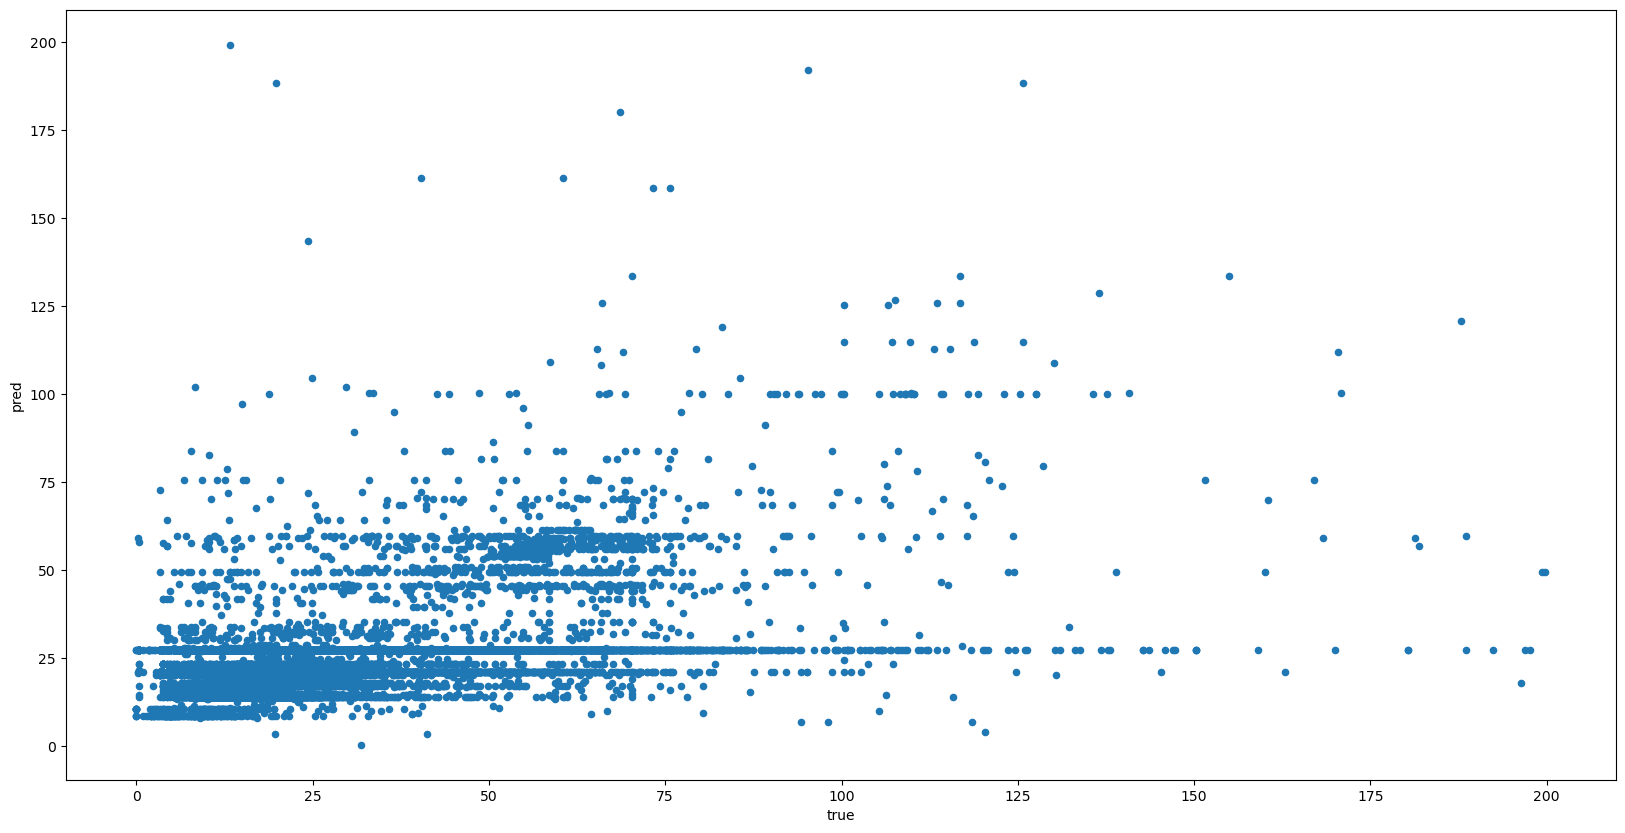

In [82]:
data = {'true': y_test,
        'pred': y_pred}

results = pd.DataFrame(data)

results.plot(figsize=(20,10), kind='scatter', x='true', y='pred');

## 7.2. Random forest <a id='random_forest'></a>

In [84]:
rf_reg = RandomForestRegressor()

rf_reg.fit(X_train, y_train)

RandomForestRegressor()

In [86]:
model_at_hand = rf_reg

y_pred = rf_reg.predict(X_test)

print('Mean absolute error:', mean_absolute_error(y_test, y_pred))
print('Mean squared error:', mean_squared_error(y_test, y_pred))
print('Root mean squared error:', sqrt(mean_squared_error(y_test, y_pred)))
print('R2:', r2_score(y_test, y_pred))

Mean absolute error: 7.44268052870311
Mean squared error: 175.48347426537066
Root mean squared error: 13.24701756114827
R2: 0.38140977669012843


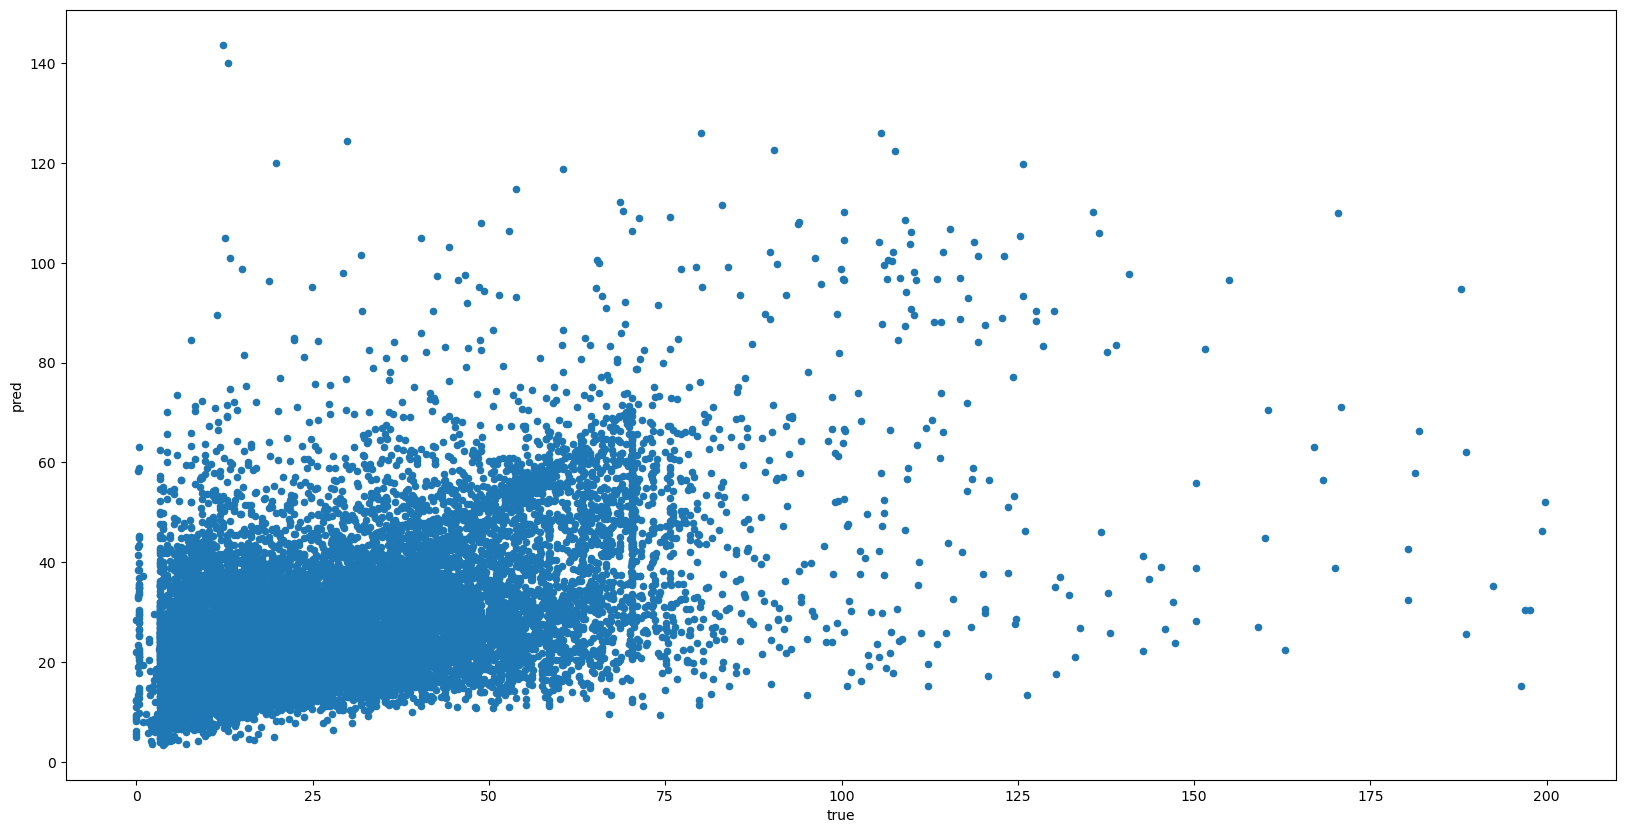

In [89]:
data = {'true': y_test,
        'pred': y_pred}

results = pd.DataFrame(data)

results.plot(figsize=(20,10), kind='scatter', x='true', y='pred');

## 7.3. Gradient boosting <a id='gradient_boosting'></a>

In [91]:
grad_booster = GradientBoostingRegressor()
grad_booster.fit(X_train, y_train)

GradientBoostingRegressor()

In [92]:
model_at_hand = grad_booster

y_pred = model_at_hand.predict(X_test)

print('Mean absolute error:', mean_absolute_error(y_test, y_pred))
print('Mean squared error:', mean_squared_error(y_test, y_pred))
print('Root mean squared error:', sqrt(mean_squared_error(y_test, y_pred)))
print('R2:', r2_score(y_test, y_pred))

Mean absolute error: 8.388418287221723
Mean squared error: 179.00261614138472
Root mean squared error: 13.379185929696348
R2: 0.36900458145419024


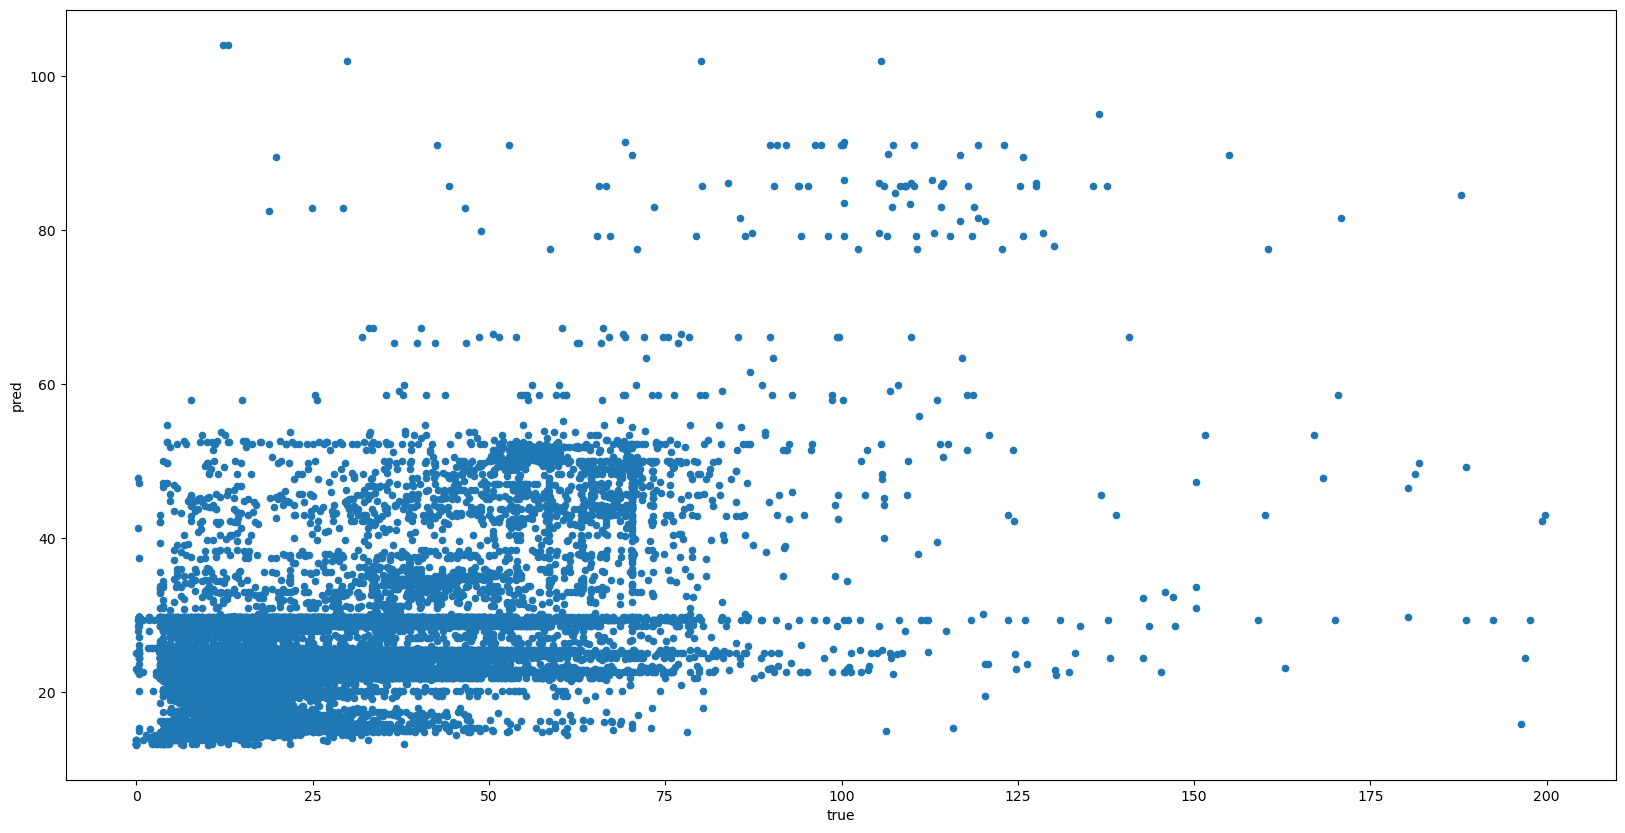

In [93]:
data = {'true': y_test,
        'pred': y_pred}

results = pd.DataFrame(data)

results.plot(figsize=(20,10), kind='scatter', x='true', y='pred');

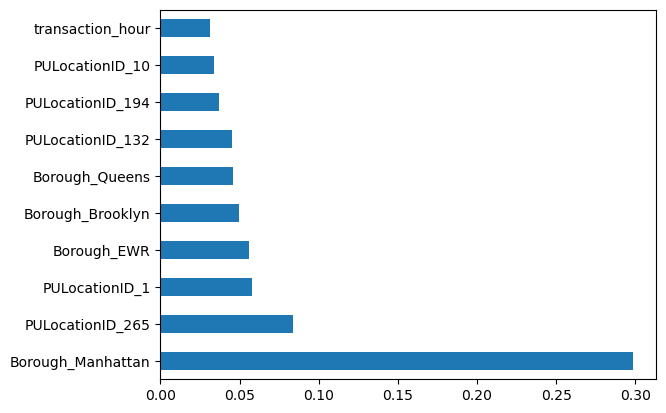

In [97]:
(pd.Series(model_at_hand.feature_importances_, index=X_train.columns)
   .nlargest(10)
   .plot(kind='barh'));

## 7.4. Comparing algorithm performances <a id='comparing_algorithm_performances'></a>

In [2]:
data = {'Algorithm': ['Benchmark model', 'Decision tree', 'Random forest', 'Gradient boosting'],
        'MAE': [9.778, 8.534, 7.426, 8.388],
        'RMSE': [14.739, 14.011, 13.212, 13.378],
        'R2': [0.225, 0.308, 0.385, 0.369]}

comparison = pd.DataFrame(data).set_index('Algorithm')
comparison

,MAE,RMSE,R2
Algorithm,,,
Benchmark model,9.778,14.739,0.225
Decision tree,8.534,14.011,0.308
Random forest,7.426,13.212,0.385
Gradient boosting,8.388,13.378,0.369


# 8. Tuning <a id='tuning'></a>
[Back to top](#table_of_contents)

## 8.1. Find best parameters

In [84]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start=200, stop=2000, num=10)]

# Number of features to consider at every split
max_features = ['auto', 'sqrt']

# Maximum number of levels in tree
max_depth = [10,20,50,100,150,200,300,500]
max_depth.append(None)

# Minimum number of samples required to split node
min_samples_split = [2,5,10,20,40]

# Minimum number of samples required at each leaf node
min_samples_leaf = [1,2,4,10,20]

# Method of selecting samples for training each tree
bootstrap = [True, False]

In [85]:
import pprint as pp

# Create random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': boostrap}

pp.pprint(random_grid)

{'bootstrap': [True, False],
 'max_depth': [10, 20, 50, 100, 150, 200, 300, 500, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4, 10, 20],
 'min_samples_split': [2, 5, 10, 20, 40],
 'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}


In [86]:
# Use random grid to search for best hyperparameters

rf = RandomForestRegressor()

rf_random = RandomizedSearchCV(estimator=rf,
                               param_distributions=random_grid,
                               n_iter=10,
                               cv=3,
                               random_state=42,
                               n_jobs=-1)

rf_random.fit(X_train, y_train)

performances = pd.DataFrame.from_dict(rf_random.cv_results_)

In [87]:
performances

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,param_min_samples_split,param_min_samples_leaf,param_max_features,param_max_depth,param_bootstrap,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,118.105591,1.569768,4.596045,0.115679,200,10,1,sqrt,200,False,"{'n_estimators': 200, 'min_samples_split': 10,...",0.401969,0.415701,0.410776,0.409482,0.005680,2
1,37.816083,1.785082,1.171262,0.049006,200,5,4,sqrt,20,True,"{'n_estimators': 200, 'min_samples_split': 5, ...",0.353635,0.371838,0.359440,0.361638,0.007592,7
2,45.301742,0.556810,1.094692,0.000010,200,40,4,sqrt,20,False,"{'n_estimators': 200, 'min_samples_split': 40,...",0.358707,0.375006,0.364068,0.365927,0.006783,5
3,839.079063,8.296718,2.777321,0.210910,400,40,10,auto,20,False,"{'n_estimators': 400, 'min_samples_split': 40,...",0.350257,0.365444,0.361640,0.359113,0.006452,8
4,3478.500491,116.613677,13.825148,1.278650,1000,20,20,auto,50,False,"{'n_estimators': 1000, 'min_samples_split': 20...",0.348881,0.369926,0.372362,0.363723,0.010542,6
5,920.141529,12.947314,34.815956,2.960245,1200,5,1,sqrt,100,False,"{'n_estimators': 1200, 'min_samples_split': 5,...",0.381648,0.394569,0.391018,0.389079,0.005451,4
6,156.336860,3.113503,4.355310,0.211609,1400,5,20,sqrt,10,True,"{'n_estimators': 1400, 'min_samples_split': 5,...",0.269462,0.279742,0.272351,0.273852,0.004328,9
7,510.560072,9.711178,18.955973,2.683210,1400,10,10,sqrt,None,True,"{'n_estimators': 1400, 'min_samples_split': 10...",0.400963,0.418214,0.407731,0.408970,0.007097,3
8,6561.315347,146.226244,30.518206,3.388077,1800,10,2,auto,50,False,"{'n_estimators': 1800, 'min_samples_split': 10...",0.212439,0.209173,0.191603,0.204405,0.009150,10
9,374.666065,28.327498,13.444679,2.110782,600,10,2,sqrt,500,False,"{'n_estimators': 600, 'min_samples_split': 10,...",0.410534,0.425575,0.421783,0.419297,0.006387,1


In [88]:
rf_random.best_params_

{'n_estimators': 600,
 'min_samples_split': 10,
 'min_samples_leaf': 2,
 'max_features': 'sqrt',
 'max_depth': 500,
 'bootstrap': False}

In [74]:
# Training the final model
best = RandomForestRegressor(n_estimators=600,
                              min_samples_split=10,
                              min_samples_leaf=2,
                              max_features='sqrt',
                              max_depth=500,
                              bootstrap=False)
    
best.fit(X_train, y_train)

model_at_hand = best

y_pred = model_at_hand.predict(X_test)

print('Mean absolute error:', mean_absolute_error(y_test, y_pred))
print('Mean squared error:', mean_squared_error(y_test, y_pred))
print('Root mean squared error:', sqrt(mean_squared_error(y_test, y_pred)))
print('R2:', r2_score(y_test, y_pred))

Mean absolute error: 7.340444129032317
Mean squared error: 162.77044849375022
Root mean squared error: 12.75815223665834
R2: 0.4262239877372521


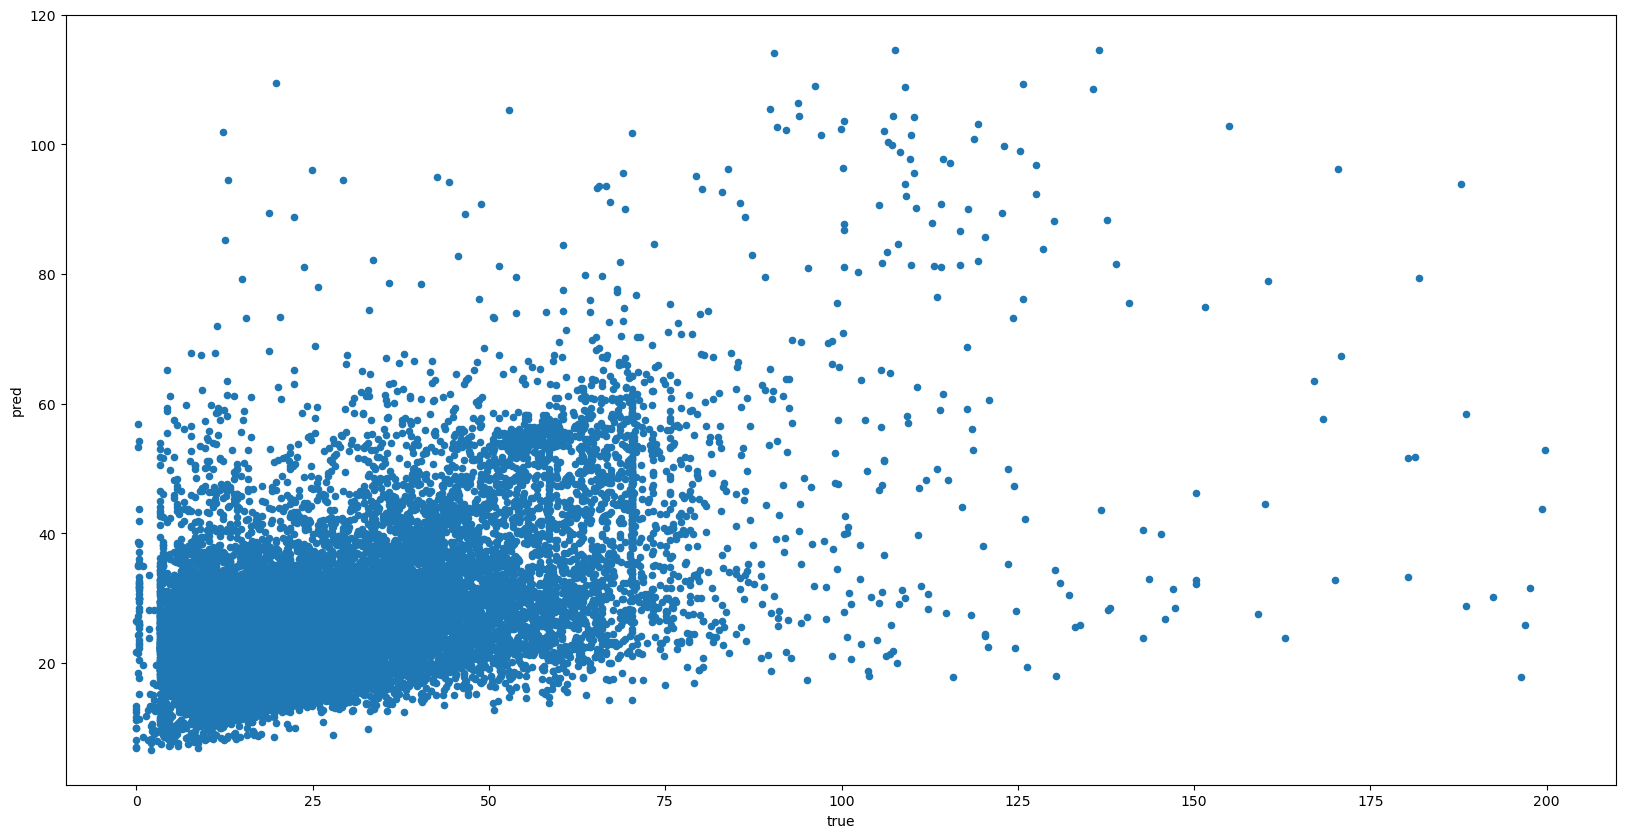

In [75]:
data = {'true': y_test, 'pred': y_pred}

results = pd.DataFrame(data)

results.plot(figsize=(20,10), kind='scatter', x='true', y='pred');